# Pandas的学习
- 数据分析三剑客
 - numpy 是解决计算的问题
 - Pandas是解决业务的方法
 - matplotlib 是做绘图展示用

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl

## 1 series
- 一维数组： 有序的数据类型，相同的集合  
- series： 是一维数组的强化版，增加了像字典一样的{Key：value}的访问机制，同时也保留了数组的访问机制  
- 字典：只是无序的集合  
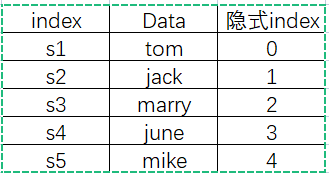

### 1.1 如何创建Series
- 通过列表，建立副本
- 通过np，建立引用
- 通过字典
- 

In [2]:
# 通过list列表构造， 副本操作，当name中的值变化时，不影响series的值
names = ["tom","jack","marry","mike"]
names
s = Series(names)
s

0      tom
1     jack
2    marry
3     mike
dtype: object

In [3]:
# 通过np构造  引用操作，当np的元素发生变化后， 直接影响到series的值
arr = np.ones(5)
arr
s = Series(arr)
s

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [4]:
#r如果没有显示索引，默认使用隐式索引填充
s2 = Series(data =names, index=["k1","k2","k3","k4"])
s2

k1      tom
k2     jack
k3    marry
k4     mike
dtype: object

In [5]:
#通过字典构造
dic ={
    "k1":"tom",
    "k3":"mary",
    "k2":"jakc"
}
s3 = Series(data=dic)
s3

k1     tom
k3    mary
k2    jakc
dtype: object

### 1.2 Series的索引与切片
- 可以使用括号去取单个索引  
- 或者通过括号中的列表取多个索引  
### 索引分显式索引和隐式索引
 （1）显式索引   
- 使用index中的元素作为引值  
- 使用.loc[]  
  ！！注意：此时时闭区间  
 （2）隐式索引  
- 使用整数作为索引值  
- 使用.iloc[]  
  ！！注意：此时时开区间  
 (3) 使用bool列表访问  
- 如果使用Series的bool列表， 要注意索引对齐，顺序可以不一致，内容要求一致  
- bool列表要和访问的对象的长度保持一致  
### 切片
- .loc[]  :闭区间  
- .iloc[] ：开区间
- 数组    
- 字典  


In [6]:
arr = np.random.randint(10,100,size=5)
arr

array([12, 46, 79, 67, 23])

In [7]:
arr[[0,1,0,1]]

array([12, 46, 12, 46])

In [8]:
arr[[True,True,False,False,False]]

array([12, 46])

In [9]:
s = Series(data=arr,index=["tom","jake","tony","marry","mike"])
s

tom      12
jake     46
tony     79
marry    67
mike     23
dtype: int32

In [10]:
#使用显示索引,类似字典ij
s["tom"]

12

In [11]:
s[["tom"]]

tom    12
dtype: int32

In [12]:
s[["tom","mike"]]

tom     12
mike    23
dtype: int32

In [13]:
#使用loc配合显式索引访问
s.loc[["tom","mike"]]

tom     12
mike    23
dtype: int32

In [14]:
#使用iloc配合隐式索引访问
s.iloc[[0,1]]

tom     12
jake    46
dtype: int32

In [15]:
#使用带索引的bool的Series列表访问
s_bool = Series(data=[True,True,False,False,False],index=["tom","jake","tony","marry","mike"])
n_bool = np.array([True,True,False,False,False])
l_bool = [True,True,False,False,False]

In [16]:
s[n_bool]

tom     12
jake    46
dtype: int32

In [17]:
s[l_bool]

tom     12
jake    46
dtype: int32

In [18]:
s[s_bool]

tom     12
jake    46
dtype: int32

In [19]:
#通过bool索引，快速筛选元素
s>60

tom      False
jake     False
tony      True
marry     True
mike     False
dtype: bool

In [20]:
s[s>60]

tony     79
marry    67
dtype: int32

In [ ]:
s["tom":"tony"]

### 1.3 Series的概念
- 可以把Series看成定长的有序字典
- 可以通过 shape，size，index，values等得到series的属性
- 当索引没有对应的值时，可能出现缺失数据显示NAN(not a number)的情况
- 可以使用pd.isnull(),pd.notnull(),或者自带isnull(),notnull()函数检测缺失数据
- 使用bool型的列表访问数组对象
- Series对象本身及其实例都有一个name属性
- 可以使用head(),tail()分别查看前n和后n的值


In [22]:
#查找tom在不在value中，返回bool
(s.index == "tom").any()

True

In [ ]:
#通过索引赋值新series
# name 当多个series组合成二维表格的时候， name将作为当前列的列名（字段名）
s2 = Series(data =np.random.randint(0,150,size=5),index=s.index,name="score")
s2

### 1.4 排序
- 根据值排序
- 根据索引排序
- 统计值出现的次数
  
**扩展知识**
  RFM :
  R: 最近消费时间
  F：消费频率
  M：消费金额

In [24]:
#根据value值来排序，默认升序排列
s2.sort_values()
s2.sort_values(ascending=False)

jake     124
marry     97
mike      27
tony      24
tom        0
Name: score, dtype: int32

In [25]:
#根据index值来排序，默认升序排列
s2.sort_index()

jake     124
marry     97
mike      27
tom        0
tony      24
Name: score, dtype: int32

In [26]:
# 统计频率
user_id =Series(data=np.random.randint(1,10,100))
user_id.value_counts()

7    15
9    14
8    13
5    13
4    13
1    10
2    10
3     8
6     4
Name: count, dtype: int64

## 1.5 Series运算
- series与数字运算，符合广播运算
- series与series之间的运算， 显式索引对齐，
## 运算符的使用
- add(): 加
- sub()：减
- mul()：乘
- div()：除

In [29]:
s1 = Series(data=np.random.randint(0,10,size=5),index=list("ABCDE"))
s2 = Series(data=np.random.randint(0,10,size=5),index=list("ABCDE"))
display(s1,s2)

A    5
B    7
C    4
D    7
E    4
dtype: int32

A    4
B    2
C    2
D    0
E    4
dtype: int32

In [30]:
s1+s2

A    9
B    9
C    6
D    7
E    8
dtype: int32

In [40]:
s3 = Series(data=np.random.randint(0,10,size=5),index=list("ABCDE"))
s4 = Series(data=np.random.randint(0,10,size=4),index=list("BCDE"))
display(s3,s4)

A    1
B    6
C    3
D    5
E    2
dtype: int32

B    1
C    6
D    4
E    9
dtype: int32

In [41]:
#保留空值的方法
s3.add(s4,fill_value=0)

A     1.0
B     7.0
C     9.0
D     9.0
E    11.0
dtype: float64